<div id="container" style="position:relative;">
<div style="position:relative; float:left"><img style="height:140px, width:280px" src ="images/covid_cover.png" />
</div>
</div>

# How can we create a Natural Language Processing (NLP) Classification Model to detect whether an article, post, and or tweet is in fact “real” or “fake”?

**Please Note:** 
<br>

**This is notebook 1 of 6** - Each article and twitter dataset will have 3 notebooks each containing a 'Loading & Merging', 'Cleaning & EDA', and a 'Vectorizing and Modeling' notebook.

-------------------------------------------------------------------------------------------------------------------

# Loading & Merging Datasets

In [3]:
# Importing everything we need 
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

## Loading in the DataFrames

**Introduction:** The data acquired from CoAID is in multiple csv file formats, and each file is labled "real" or "fake". To begin we will need to load in each dataset seperately then we can go ahead and combine all (8) datasets (4-"real")(4-"fake") to leave us with our final dataset that we will be working with throughout this project.

### Fake News DataFrames

**Reference to [Github](<https://github.com/cuilimeng/CoAID/blob/master/README.md>) for CoAID dataset access.** 
<br>

> @misc{cui2020coaid,
<br>
    title={CoAID: COVID-19 Healthcare Misinformation Dataset},
<br>
    author={Limeng Cui and Dongwon Lee},
<br>
    year={2020},
<br>
    eprint={2006.00885},
<br>
    archivePrefix={arXiv},
<br>
    primaryClass={cs.SI}
<br>
}


In [4]:
# Read in All fake dataset csv files
fake_df1 = pd.read_csv('data/NewsFakeCOVID-19.csv') # 1st fake csv file
fake_df2 = pd.read_csv('data/NewsFakeCOVID-19-2.csv') # 2nd fake csv file
fake_df3 = pd.read_csv('data/NewsFakeCOVID-19-3.csv') # 3rd fake csv file
fake_df4 = pd.read_csv('data/NewsFakeCOVID-19-4.csv') # 4th fake csv FIle

I will be naming the final combined fake news dataset: **"untrue_news_df"**

In [5]:
# Concat and Name Data Frames
fake_frames = [fake_df1, fake_df2, fake_df3, fake_df4] # Create feature: Fake df 1-4
untrue_news_df = pd.concat(fake_frames) # Concat the Feature DF's 
untrue_news_df # New df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,""""""
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,971,post,https://healthfeedback.org/claimreview/the-vir...,https://archive.is/8cPJC,https://www.youtube.com/watch?v=qFlqXPl_hZQ&fe...,NaN,NaN,NaN,NaN,Genetic evidence within the Spike gene of the ...,"""Coronavirus whistleblower speaks out about po...",NaN,dr. li meng yan joins tucker carlson with insi...,9/15/20,"""coronavirus whistleblower, fox news whistlebl..."
27,972,post,https://healthfeedback.org/claimreview/cloth-m...,https://archive.is/Qca7p,https://www.facebook.com/108082977404530/posts...,NaN,NaN,NaN,NaN,Cloth masks cannot block smoke particles which...,"""Log In or Sign Up to View""",do you want to join facebook ?.,NaN,NaN,""""""
28,973,post,https://www.factcheck.org/2020/09/viral-post-f...,NaN,https://www.facebook.com/fred.childs.5/posts/1...,https://www.facebook.com/larry.henrichs.1/post...,https://www.facebook.com/photo.php?fbid=330913...,NaN,NaN,PGA golfer Bubba Wallace wrote Facebook post t...,"""Fred Childs""",see more of fred childs on facebook.,hooray for bubba watson. he put into words wha...,NaN,""""""
29,974,post,https://healthfeedback.org/claimreview/covid-1...,https://archive.vn/VAdYH,https://www.facebook.com/BenSwannRealityCheck/...,NaN,NaN,NaN,NaN,The World Integrated Trade Solutions (WITS) we...,"""Ben Swann""",part of what infuriates trump supporters is th...,this is incredibly strange. world bank website...,NaN,""""""


Let's take a look at the final shape of the untrue news dataframe to make sure the data has been merged properly.

In [6]:
untrue_news_df.shape

(925, 15)

Looks good!

Next, we will apply the same steps to the Real News Dataframe that was used on the Fake News Dataframe.

#### Real News DataFrame

In [7]:
# Read in all Real Data sets
real_df1 = pd.read_csv('data/NewsRealCOVID-19.csv') # 1st real csv file
real_df2 = pd.read_csv('data/NewsRealCOVID-19-2.csv') # 2nd real csv file
real_df3 = pd.read_csv('data/NewsRealCOVID-19-3.csv') # 3rd real csv file
real_df4 = pd.read_csv('data/NewsRealCOVID-19-4.csv') # 4th real csv file

I will be naming the final combined fake news dataset: **"true_news_df"**

In [8]:
# Concat and Name Data Frames
real_frames = [real_df1, real_df2, real_df3, real_df4] # Create new feature for all df's
true_news_df = pd.concat(real_frames) # Concat the dataframes
true_news_df # new name for dataframe

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i..."
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ..."
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre..."
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,..."
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi..."
...,...,...,...,...,...,...,...,...,...,...
917,10078,article,https://www.politifact.com/factchecks/2020/oct...,https://www.themonitor.com/2020/10/05/kamala-h...,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",NaN,NaN,NaN,""""""
918,10079,article,https://www.politifact.com/factchecks/2020/oct...,https://www.wral.com/cooper-forest-engage-in-l...,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb..."
919,10080,post,https://www.politifact.com/factchecks/2020/oct...,https://www.facebook.com/photo.php?fbid=402154...,“Wisconsin Republicans have not passed a singl...,"""Facebook""",NaN,NaN,NaN,""""""
920,10081,post,https://www.politifact.com/factchecks/2020/sep...,https://twitter.com/SenChrisLarson/status/1308...,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,NaN,NaN,""""""


In [9]:
true_news_df.shape

(4532, 10)

Great, so far so good. We now have 2 dataframes that are ready to be merged together to form the final dataframe.

### Labeling the DataFrames "Fake" or "True"

Before we merge our final "real" and "fake" news dataframes into 1 main dataframe we will have to create a new column named `label` so that we can differentiate each index from one another. This will be incredibly critical to our Exploratory Data Analysis and Modeling.

#### Fake News Label

In [10]:
# Create new Columns and Label Fake
untrue_news_df["label"]="fake"

In [11]:
# Sanity Check
untrue_news_df.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN,fake


In [12]:
untrue_news_df.shape

(925, 16)

Great, the new `label` feature was added to the dataframe. Let's move on to repeating the process for the real news dataframe.

#### Real News Label

In [13]:
# Creat new COlumn and Label Real
true_news_df["label"]="real"
# Sanity Check
true_news_df.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i...",real
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ...",real
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre...",real
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,...",real
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi...",real


In [14]:
true_news_df.shape

(4532, 11)

Sucess! Now it is time for us to finally merge the dataframes to form our final dataframe that will be used for EDA and Modeling.

## Merge Real & Fake News DataFrames

In [15]:
# Append dataframes (Real and Fake)
CoAID_df = untrue_news_df.append(true_news_df).fillna(0)

Let's check and make sure that the dataframes did in fact merge togther.

In [16]:
# Sanity Check
CoAID_df

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,label
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,0,0,0,0,Facebook posts shared in at least three countr...,0,0,0,0,0,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr...,0,http://legis.wisconsin.gov/assembly/republican...,0,0,0,0,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,0,0,"""""",fake
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,0,0,0,0,Facebook posts claim a child who is infected w...,0,0,0,0,0,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/kokernagnews/photos/a...,0,0,0,0,IndiaÕs Ministry of Home Affairs banning citiz...,0,0,0,0,0,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,0,https://www.facebook.com/photo.php?fbid=102193...,0,0,0,0,"42 Democratic senators, plus two Independents,...",0,0,0,0,0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,10078,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.themonitor.com/2020/10/05/kamala-h...,0,0,0,0,Says the “The Rio Grande Valley is 4.7% of the...,"""403 Forbidden""",0,0,0,"""""",real
918,10079,article,https://www.politifact.com/factchecks/2020/oct...,0,https://www.wral.com/cooper-forest-engage-in-l...,0,0,0,0,"Georgia has “almost 100,000 more (COVID-19) ca...","""Cooper, Forest engage in lone gubernatorial d...",governor dan forest. live debate at u. n c. t ...,democratic gov. roy cooper and republican lt. ...,2020-10-14T18:47:00-04:00,"""Roy Cooper,Dan Forest,2020 governors race,deb...",real
919,10080,post,https://www.politifact.com/factchecks/2020/oct...,0,https://www.facebook.com/photo.php?fbid=402154...,0,0,0,0,“Wisconsin Republicans have not passed a singl...,"""Facebook""",0,0,0,"""""",real
920,10081,post,https://www.politifact.com/factchecks/2020/sep...,0,https://twitter.com/SenChrisLarson/status/1308...,0,0,0,0,“(Republicans) have the power to overturn the ...,"""""",this browser is no longer supported. please sw...,0,0,"""""",real


Successful merge! 

I like to always check if there are any missing values within the dataframe, I can then make note of that and handle it in the cleaning phase.

In [17]:
# Check missing values
missing_fraction = CoAID_df.isna().sum()/CoAID_df.shape[0]*100
# Sanity Check
missing_fraction

Unnamed: 0        0.0
type              0.0
fact_check_url    0.0
archive           0.0
news_url          0.0
news_url2         0.0
news_url3         0.0
news_url4         0.0
news_url5         0.0
title             0.0
newstitle         0.0
content           0.0
abstract          0.0
publish_date      0.0
meta_keywords     0.0
label             0.0
dtype: float64

Also, take a quick glimpse at what kind of data you will be working with. I think it's best to get acquainted with the data as soon as possible.

In [18]:
# Columns Sanity Check
CoAID_df.columns

Index(['Unnamed: 0', 'type', 'fact_check_url', 'archive', 'news_url',
       'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
       'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords',
       'label'],
      dtype='object')

In [19]:
# Dataframe Size Check
CoAID_df.shape

(5457, 16)

In [22]:
CoAID_df.head(3).values

array([[0, 'post',
        'https://factcheck.afp.com/false-advice-refusing-vaccines-circulates-during-covid-19-pandemic',
        'https://perma.cc/J4N6-39D5',
        'https://www.facebook.com/photo.php?fbid=551960552369167&set=a.112646526300574&type=3',
        0, 0, 0, 0,
        'Facebook posts shared in at least three countries as scientists work to develop a COVID-19 vaccine claim to offer a legal way to refuse vaccination.',
        0, 0, 0, 0, 0, 'fake'],
       [1, 'article',
        'https://www.politifact.com/factchecks/2020/apr/21/wisconsin-republican-legislative-leaders/no-wisconsin-not-clearly-seeing-decline-covid-case/',
        0,
        'http://legis.wisconsin.gov/assembly/republicans/news/wisconsin-legislature-takes-gov-evers-to-court/',
        0, 0, 0, 0,
        'Wisconsin is Òclearly seeing a decline in COVID infectionsÓ.',
        '"Wisconsin Legislature Takes Gov. Evers to Court"',
        'speaker robin vos r rochester and senate majority leader scott fitzger

## Save newly created dataframe to csv file

Ok, everything so far has gone to plan and now we will create and save the new dataframe to a csv file that we can go ahead and use in our EDA and Modeling notebooks.

In [25]:
# Save new dataframe to csv file
CoAID_df.to_csv (('CoAID_df.csv'), index = False, header=True)

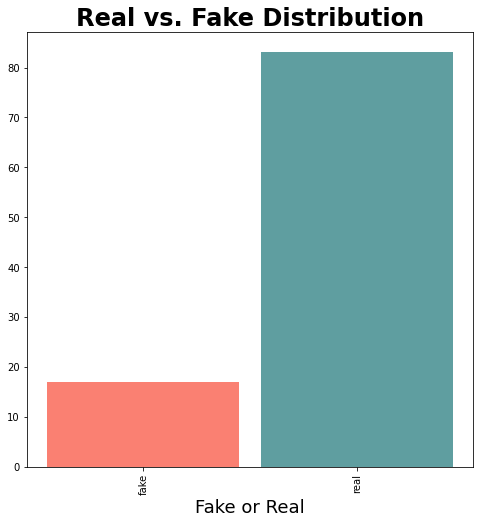

In [24]:
# Rename df to data for ease
data = CoAID_df

# Create Values and Counts feature
values, counts = np.unique(data['label'], return_counts=True)
normalized_counts = counts / counts.sum() # Create % counts

# PLot figure using Matplotlib
plt.figure(figsize=(8, 8))
plt.bar(values, normalized_counts * 100, width=.9, color=['salmon', 'cadetblue'])
plt.xlabel('Fake or Real', fontsize=18)
plt.xticks(rotation=90)
plt.title("Real vs. Fake Distribution", fontweight=800, fontsize=24)
plt.show()

The distribution is off ~18% fake and ~82% real. This is a final check to make sure the data is combined, but it also serves as a heads up - telling us to handle the skewed data during our upcoming proccesses.

# End of Part 1 of 6: Please Refer to Part 2 of 6